In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
words = 'man woman king queen'.split()
v = { i: nlp.vocab[i].vector for i in words }
matrix = np.stack(list(v.values()))

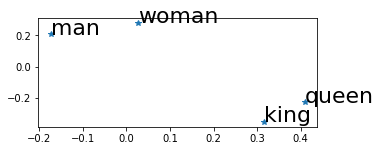

In [4]:
plt.figure(figsize = (5,2))
ax = plt.plot(matrix[:,0], matrix[:,1], '*')
for i, word in enumerate(words): plt.text(matrix[i,0], matrix[i,1], word, size=22)

In [5]:
k,r,s = nlp.vocab.vectors.most_similar( (v['king'] - v['man'] + v['woman']).reshape(1,-1), n=10)
for K,R,S in zip(k[0],r[0],s[0]):
    print(nlp.vocab[K].text,R,S,)

King 2182 0.8024
KIng 3149 0.8024
Queen 5309 0.7881
QUEEN 6025 0.7881
COMMONER 11899 0.6401
Prince 7473 0.6401
Kings 6602 0.6209
SULTANS 9575 0.6209
Princess 8297 0.6126
PRINCESSES 9117 0.6126


In [6]:
doc = nlp("The quick fox jumped over a tree")

In [7]:
for toc in doc:
    print( toc.text, toc.pos_, toc.dep_, spacy.explain(toc.dep_), toc.head )
spacy.displacy.render(doc)

The DET det determiner fox
quick ADJ amod adjectival modifier fox
fox NOUN nsubj nominal subject jumped
jumped VERB ROOT None jumped
over ADP prep prepositional modifier jumped
a DET det determiner tree
tree NOUN pobj object of preposition over
